In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

In [ ]:
# Cargar datos de Spatial Transcriptomics para cada paciente
# Cargar los datos de Spatial Transcriptomics para el paciente 15
sp_data_folder_15 = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Patient_15/Spatial_transcriptomics/Processed_data'
adata_15 = sc.read_visium(sp_data_folder_15, count_file='GSM5420749_filtered_feature_bc_matrix.h5', load_images=True)
# Paciente 16
sp_data_folder_16 = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Patient_16/Spatial_transcriptomics/Processed_data'
adata_16 = sc.read_visium(sp_data_folder_16, count_file='GSM5420750_filtered_feature_bc_matrix.h5', load_images=True)

# Paciente 19
sp_data_folder_19 = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Patient_19/Spatial_transcriptomics/Processed_data'
adata_19 = sc.read_visium(sp_data_folder_19, count_file='GSM5420751_filtered_feature_bc_matrix.h5', load_images=True)

# Paciente 24
sp_data_folder_24 = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Patient_24/Spatial_transcriptomics/Processed_data'
adata_24 = sc.read_visium(sp_data_folder_24, count_file='GSM5420752_filtered_feature_bc_matrix.h5', load_images=True)

# Paciente 26
sp_data_folder_26 = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Patient_26/Spatial_transcriptomics/Processed_data'
adata_26 = sc.read_visium(sp_data_folder_26, count_file='GSM5420753_filtered_feature_bc_matrix.h5', load_images=True)

# Paciente 27
sp_data_folder_27 = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Patient_27/Spatial_transcriptomics/Processed_data'
adata_27 = sc.read_visium(sp_data_folder_27, count_file='GSM5420754_filtered_feature_bc_matrix.h5', load_images=True)

In [4]:
# Hacer los nombres de las variables únicos para cada objeto AnnData
adata_15.var_names_make_unique()
adata_16.var_names_make_unique()
adata_19.var_names_make_unique()
adata_24.var_names_make_unique()
adata_26.var_names_make_unique()
adata_27.var_names_make_unique()

In [11]:
adata_16

AnnData object with n_obs × n_vars = 1716 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'thing'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

In [6]:
print("Dimensiones de adata_15:", adata_15.shape)
print("Dimensiones de adata_16:", adata_16.shape)
print("Dimensiones de adata_19:", adata_19.shape)
print("Dimensiones de adata_24:", adata_24.shape)
print("Dimensiones de adata_26:", adata_26.shape)
print("Dimensiones de adata_27:", adata_27.shape)
# Question: How many spots are within a single capture area on the Visium v1 Spatial Gene Expression Slide?
#Answer: There are a total of 4992 total spots per capture area

Dimensiones de adata_15: (2112, 36601)
Dimensiones de adata_16: (1716, 36601)
Dimensiones de adata_19: (946, 36601)
Dimensiones de adata_24: (1298, 36601)
Dimensiones de adata_26: (4342, 36601)
Dimensiones de adata_27: (2152, 36601)


In [7]:
adata_15.uns['spatial']['sample3']['images']['hires']
# Representa la imagen de alta resolución en formato RGB
# objeto 3D donde cada elemento representa un píxel en la imagen

array([[[0.9647059 , 0.96862745, 0.96862745],
        [0.9647059 , 0.9607843 , 0.96862745],
        [0.95686275, 0.94509804, 0.9607843 ],
        ...,
        [0.9372549 , 0.9490196 , 0.96862745],
        [0.9372549 , 0.9490196 , 0.96862745],
        [0.9411765 , 0.9490196 , 0.972549  ]],

       [[0.9607843 , 0.9607843 , 0.9647059 ],
        [0.94509804, 0.9098039 , 0.91764706],
        [0.8235294 , 0.8156863 , 0.7921569 ],
        ...,
        [0.9411765 , 0.9490196 , 0.96862745],
        [0.9411765 , 0.94509804, 0.96862745],
        [0.9411765 , 0.9490196 , 0.96862745]],

       [[0.95686275, 0.9490196 , 0.95686275],
        [0.88235295, 0.8745098 , 0.8627451 ],
        [0.78431374, 0.827451  , 0.827451  ],
        ...,
        [0.9411765 , 0.9490196 , 0.96862745],
        [0.9411765 , 0.9490196 , 0.96862745],
        [0.9411765 , 0.9490196 , 0.96862745]],

       ...,

       [[0.92941177, 0.94509804, 0.9607843 ],
        [0.9254902 , 0.9490196 , 0.9607843 ],
        [0.92941177, 0

Cada valor dentro del array es un número en el rango de 0 a 1, que representa la intensidad de color de cada canal para un píxel específico ( 0 es negro, 1 blanco). 0.9647059 para el canal rojo en el primer píxel significa que el color rojo está casi completamente presente, pero no en su máxima intensidad. El primer píxel tiene valores: [0.9647059, 0.96862745, 0.96862745] que son rojo, verde y azul.

In [10]:
# Dimensiones de la imagen de alta resolución
print("Paciente 15:", adata_15.uns['spatial']['sample3']['images']['hires'].shape)
print("Paciente 16:", adata_16.uns['spatial']['L4']['images']['hires'].shape)
print("Paciente 19:", adata_19.uns['spatial']['sample4']['images']['hires'].shape)
print("Paciente 24:", adata_24.uns['spatial']['L3']['images']['hires'].shape)
print("Paciente 26:", adata_26.uns['spatial']['L1']['images']['hires'].shape)
print("Paciente 27:", adata_27.uns['spatial']['L2']['images']['hires'].shape)



Paciente 15: (1870, 2000, 3)
Paciente 16: (1818, 2000, 3)
Paciente 19: (1867, 2000, 3)
Paciente 24: (2000, 1874, 3)
Paciente 26: (2000, 1868, 3)
Paciente 27: (2000, 1868, 3)


(Altura, Anchura, Canales de Color):
Altura: El primer número representa la altura de la imagen en píxeles. Por ejemplo, para el Paciente 15, la imagen tiene 1870 píxeles de altura.
Anchura: El segundo número representa el ancho de la imagen en píxeles. Para el Paciente 15, la imagen tiene 2000 píxeles de ancho.
Canales de Color: El tercer número indica el número de canales de color en la imagen. En este caso, el valor es 3, lo que significa que es una imagen en color RGB (Rojo, Verde, Azul).

## Paciente 16

#### Prepare / cleanup the data for analysis

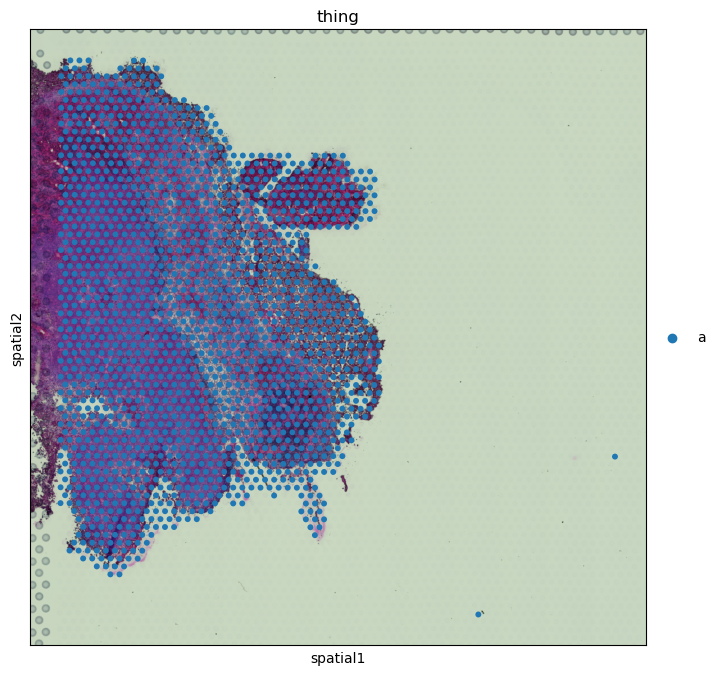

In [8]:
# Vemos todos los spots sin control de calidad
adata_16.obs['thing'] = 'a'
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_16, color = 'thing')


In [ ]:
#https://scanpy.readthedocs.io/en/stable/tutorials/spatial/basic-analysis.html

In [13]:
ribo_genes = pd.read_csv('/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/KEGG_RIBOSOME.v2023.1.Hs.csv', skiprows=2, header=None)
adata_16.var["mt"] = adata_16.var_names.str.startswith("MT-")
adata_16.var['ribo'] = adata_16.var_names.isin(ribo_genes[0].values)

sc.pp.calculate_qc_metrics(adata_16, qc_vars=["mt", 'ribo'], inplace=True)

In [14]:
adata_16.obs.head()

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACACCAATAACTGC-1          1         59         19     a               4090   
AAACAGCTTTCAGAAG-1          1         43          9     a               3793   
AAACAGGGTCTATATT-1          1         47         13     a               4309   
AAACCGGGTAGGTACC-1          1         42         28     a               4308   
AAACCGTTCGTCCAGG-1          1         52         42     a               1309   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACACCAATAACTGC-1                 8.316545       18917.0            9.847869   
AAACAGCTTTCAGAAG-1                 8.241176       17094.0            9.746541   
AAACAGGGTCTATATT-1                 8.368693       20349.0            9.920836   
AAACCGGGTAGGTACC-1                 8.368461       19406.0            9.873389   
AAACCGTTCGTCCAGG-1                 7.177782        3294.0            8.100162   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACACCAATAACTGC-1                   34.883967                    47.428239   
AAACAGCTTTCAGAAG-1                   32.871183                    47.396747   
AAACAGGGTCTATATT-1                   32.232542                    46.523171   
AAACCGGGTAGGTACC-1                   30.289601                    43.651448   
AAACCGTTCGTCCAGG-1                   42.714026                    52.884032   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACACCAATAACTGC-1                    57.287096                    69.302744   
AAACAGCTTTCAGAAG-1                    58.020358                    70.369720   
AAACAGGGTCTATATT-1                    57.236228                    69.266303   
AAACCGGGTAGGTACC-1                    54.988148                    67.989282   
AAACCGTTCGTCCAGG-1                    62.112933                    75.440194   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACACCAATAACTGC-1           2346.0               7.760893      12.401544   
AAACAGCTTTCAGAAG-1            866.0               6.765039       5.066105   
AAACAGGGTCTATATT-1           1625.0               7.393878       7.985651   
AAACCGGGTAGGTACC-1           1129.0               7.029973       5.817789   
AAACCGTTCGTCCAGG-1            247.0               5.513429       7.498482   

                    total_counts_ribo  log1p_total_counts_ribo  \
AAACACCAATAACTGC-1             5120.0                 8.541105   
AAACAGCTTTCAGAAG-1             5551.0                 8.621914   
AAACAGGGTCTATATT-1             6224.0                 8.736329   
AAACCGGGTAGGTACC-1             5133.0                 8.543640   
AAACCGTTCGTCCAGG-1              607.0                 6.410175   

                    pct_counts_ribo  
AAACACCAATAACTGC-1        27.065601  
AAACAGCTTTCAGAAG-1        32.473381  
AAACAGGGTCTATATT-1        30.586269  
AAACCGGGTAGGTACC-1        26.450583  
AAACCGTTCGTCCAGG-1        18.427444

In [15]:
number_of_spots = adata_16.obs_names.shape[0]
mean_reads_per_spot = adata_16.obs['total_counts'].mean()
median_genes_per_spot = adata_16.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)

Number of spots under tissue: 1716
Mean reads per spot: 8896.322
Median genes per spot: 2139.0


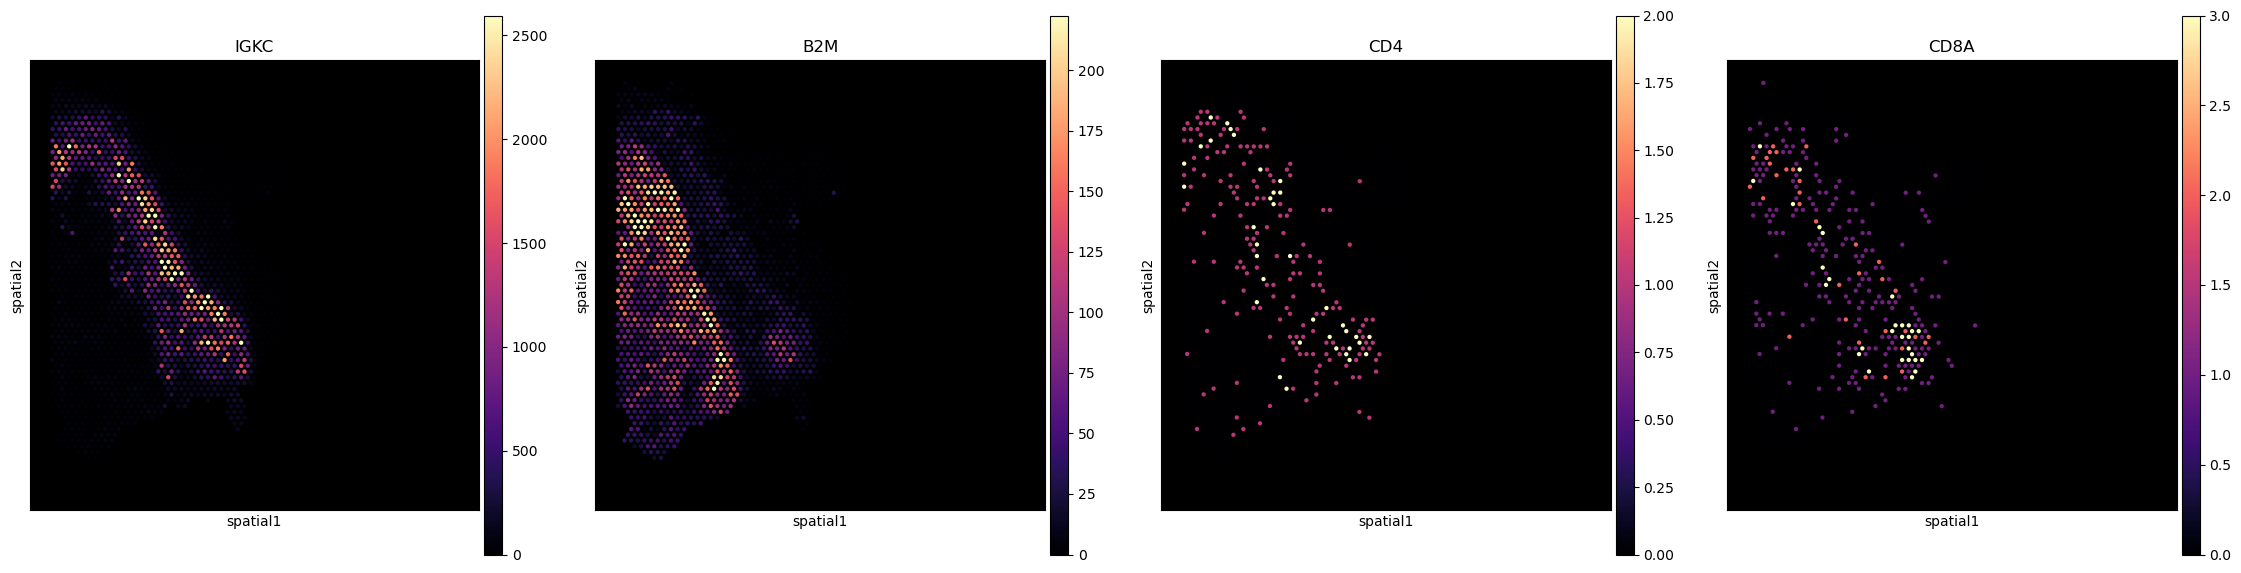

In [16]:
with mpl.rc_context({'figure.figsize': [6,7],
                     'axes.facecolor': 'black'}):
  sc.pl.spatial(adata_16, color=["IGKC", "B2M", "CD4","CD8A"], img_key=None, size=1,
                    vmin=0, cmap='magma', vmax='p99.0',
                    gene_symbols='SYMBOL'
                  ) 

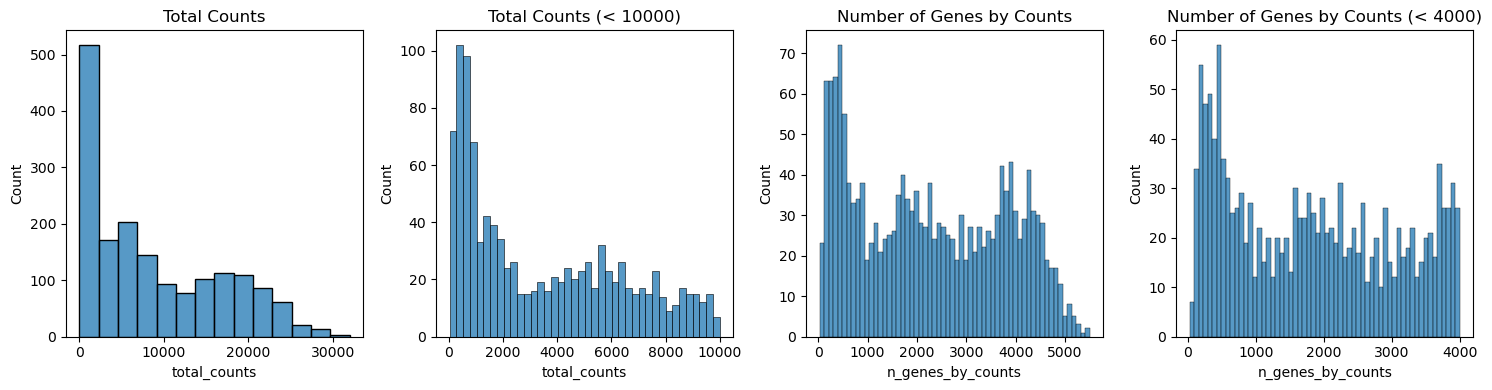

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

# Histograma de total_counts
sns.histplot(adata_16.obs["total_counts"], kde=False, ax=axs[0])
axs[0].set_title("Total Counts")

# Histograma de total_counts filtrando < 10000
sns.histplot(
    adata_16.obs["total_counts"][adata_16.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
axs[1].set_title("Total Counts (< 10000)")

# Histograma de n_genes_by_counts
sns.histplot(adata_16.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
axs[2].set_title("Number of Genes by Counts")

# Histograma de n_genes_by_counts filtrando < 4000
sns.histplot(
    adata_16.obs["n_genes_by_counts"][adata_16.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)
axs[3].set_title("Number of Genes by Counts (< 4000)")

plt.tight_layout()
plt.show()

### Filtering

No voy a aplicar ningú filtro intento que se parezcan los spots lo más parecido al paper

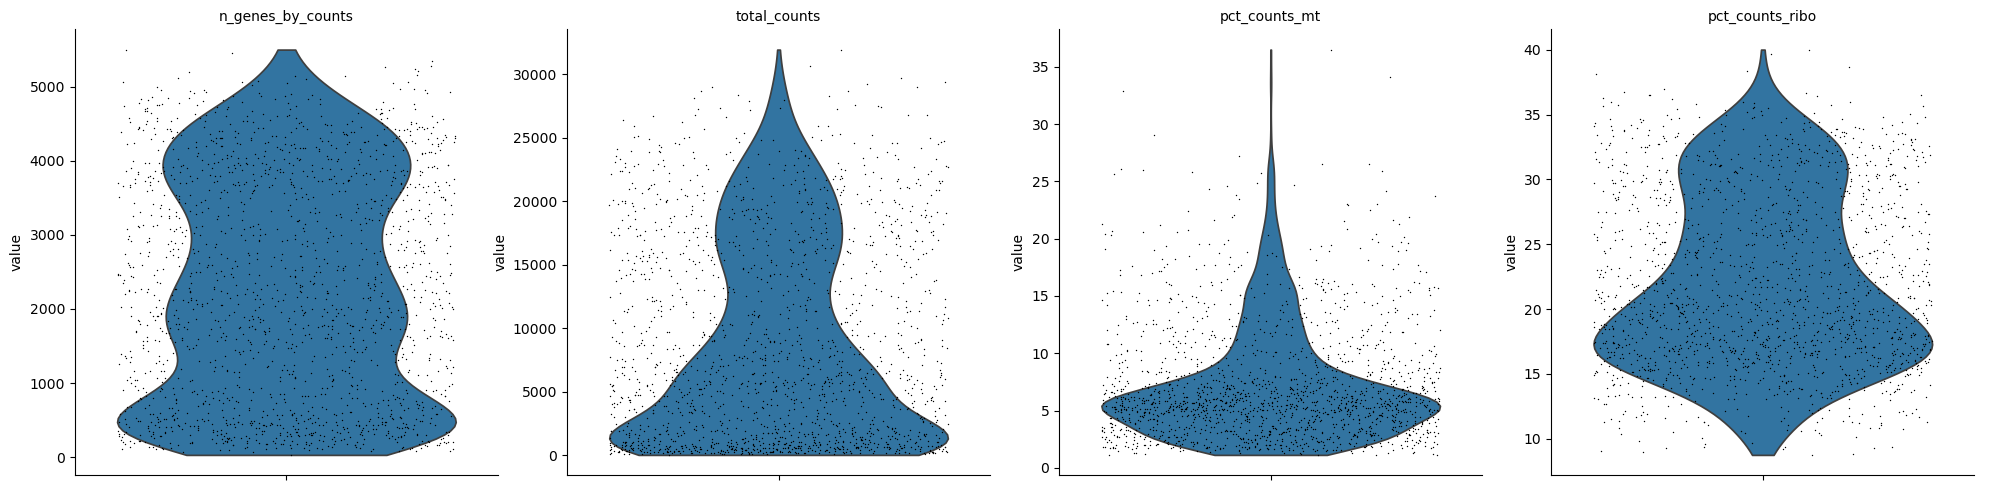

In [18]:
sc.pl.violin(adata_16, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [60]:
# sc.pp.filter_cells(adata_16, min_counts = 1000)
# sc.pp.filter_cells(adata_16, max_counts=35000) #based on the following QC this should be reduced
# sc.pp.filter_cells(adata, min_counts=1500)
# sc.pp.filter_cells(adata, max_counts=6000)
# adata = adata[adata.obs["pct_counts_MT"] < 40]  
# adata = adata[adata.obs["pct_counts_ribo"] < 8]

In [20]:
# adata_16 = adata_16[adata_16.obs["pct_counts_mt"] < 20]
sc.pp.filter_genes(adata_16, min_cells=3)

In [21]:
adata_16
# de 36000 genes  a 17000

AnnData object with n_obs × n_vars = 1716 × 17354
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

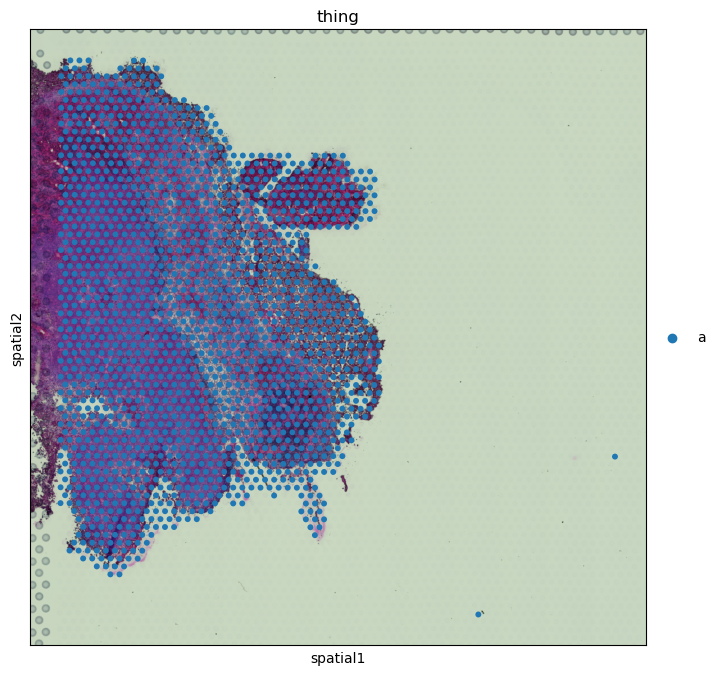

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_16, color = 'thing')

Se quedan los mismos puntos que hay en el paper

In [22]:
# Guardar los datos crudos en una capa llamada 'counts'
adata_16.layers["counts"] = adata_16.X.copy()

In [24]:
sc.pp.normalize_total(adata_16, inplace=True)
sc.pp.log1p(adata_16)

In [25]:
# Guardar los datos normalizados en una capa llamada 'normalized'
adata_16.layers["normalized"] = adata_16.X.copy()

In [27]:
sc.pp.highly_variable_genes(adata_16, flavor="seurat", n_top_genes=2000)

In [28]:
# Paso 1: Calcular PCA con 21 componentes principales
sc.pp.pca(adata_16, n_comps=21)
# Paso 2: Calcular los vecinos con 100 vecinos y utilizando 21 componentes principales
sc.pp.neighbors(adata_16, n_neighbors=100, n_pcs=21)  

/home/evercher/miniforge3/envs/single_cell_3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
# Usa 100 vecinos y 21 componentes principales
sc.tl.umap(adata_16, min_dist=0)

In [32]:
sc.tl.leiden(adata_16, resolution=0.9)

/home/evercher/tmpdir/ipykernel_370/1322293964.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_16, resolution=0.9)


In [33]:
adata_16

AnnData object with n_obs × n_vars = 1716 × 17354
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'thing_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized'
    obsp: 'distances', 'connectivities'

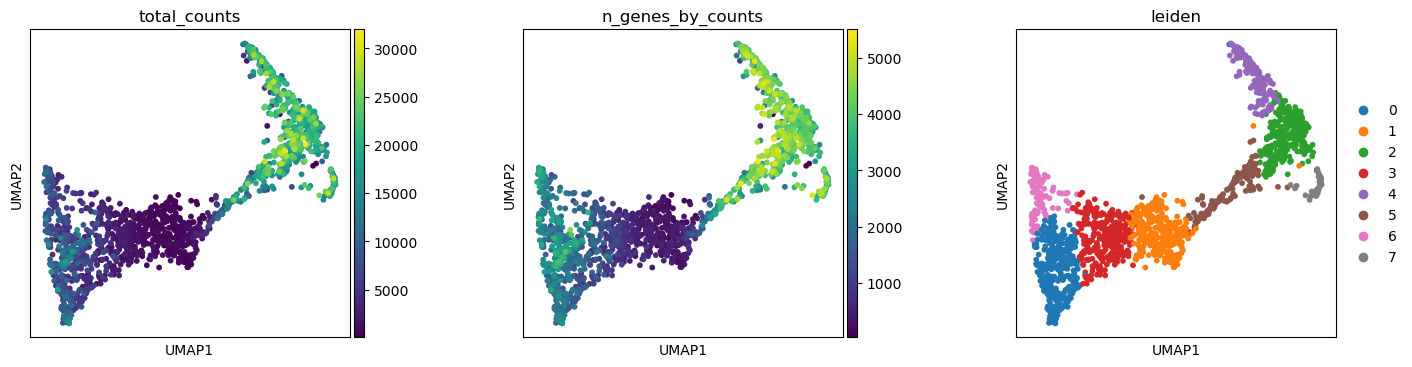

In [34]:
#you can tell something is wrong in this QC becuase counts are biased by location/cluster
#may want to reduce threshold to remove

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_16, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

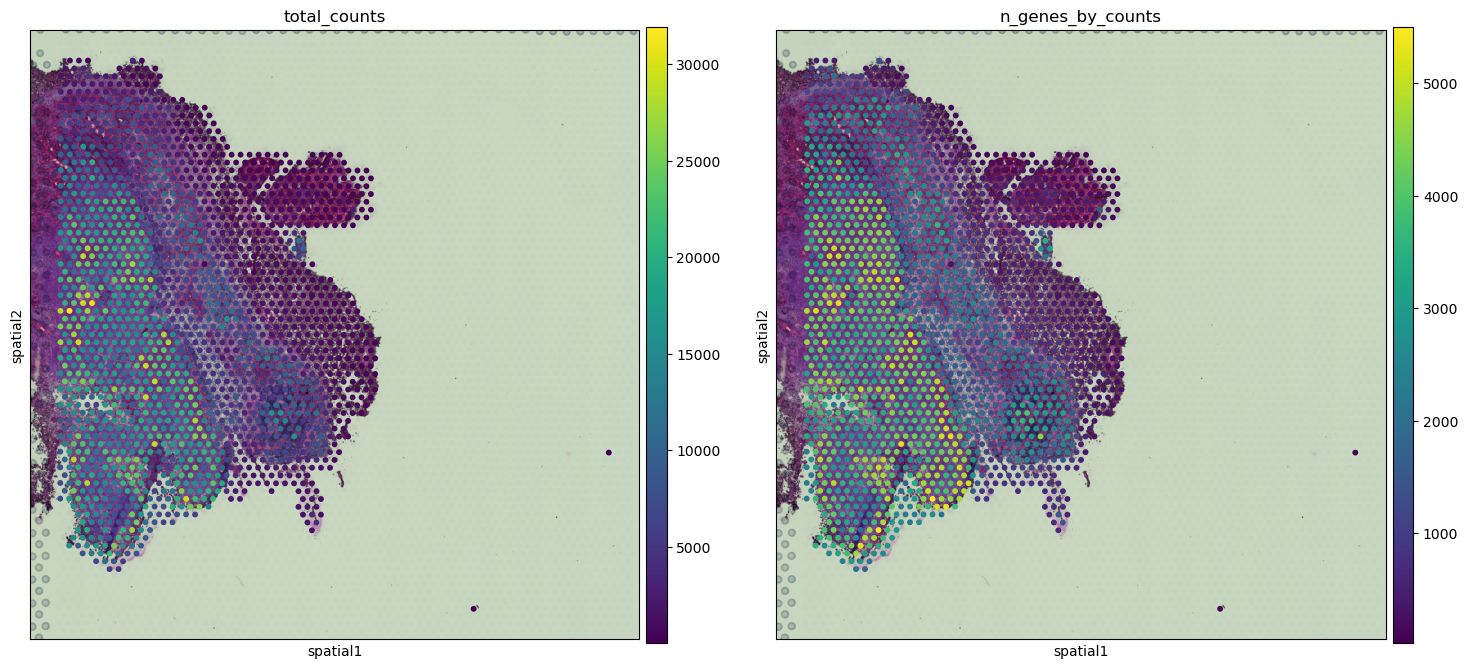

In [35]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_16, img_key="hires", color=["total_counts", "n_genes_by_counts"])

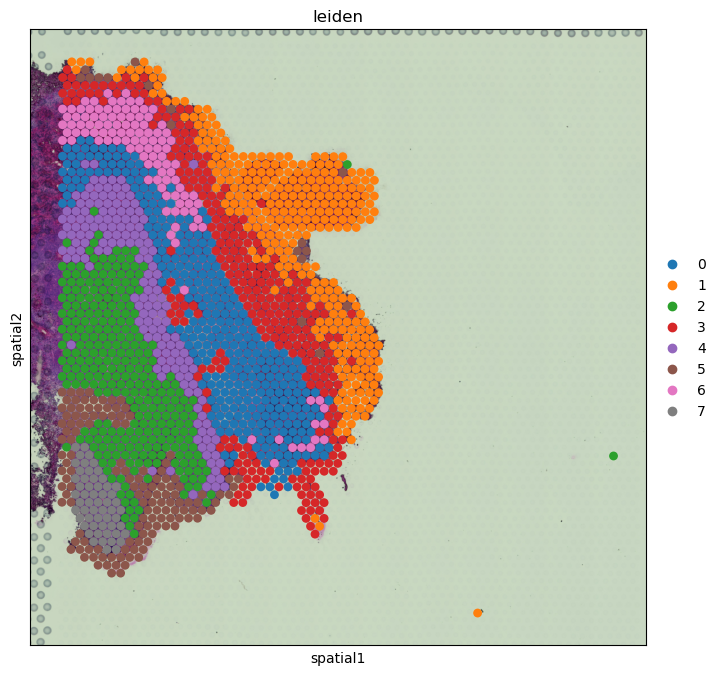

In [36]:
sc.pl.spatial(adata_16, img_key="hires", color="leiden", size=1.5)

### Identify highly-variable genes

#### Dimensionality reduction and clustering

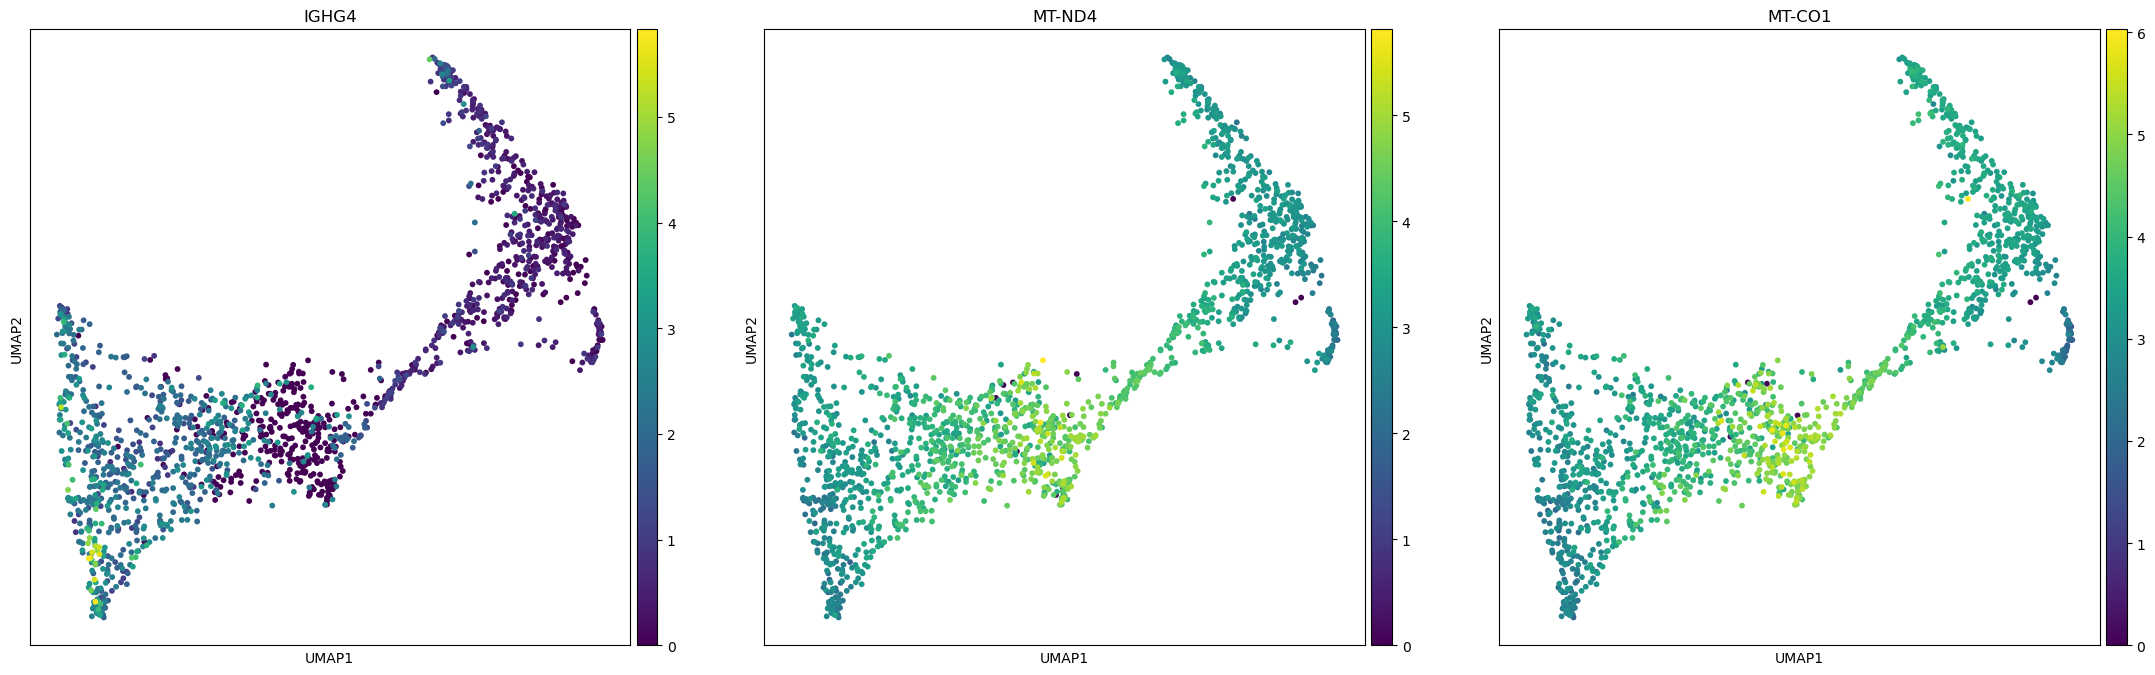

In [37]:
sc.pl.umap(adata_16, color=["IGHG4", "MT-ND4", "MT-CO1"])

### Find marker genes 

In [38]:
sc.tl.rank_genes_groups(adata_16, 'leiden', method='wilcoxon')

In [39]:
adata_16.uns['rank_genes_groups']['names'][1]


np.record(('IGLC2', 'MT-CYB', 'RPL11', 'IGKC', 'B2M', 'S100A6', 'COL4A2', 'PLCG2'), dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O')])

In [40]:
adata_16.uns['rank_genes_groups']['names'].dtype.names

('0', '1', '2', '3', '4', '5', '6', '7')

In [41]:
#convert to dataframe
results = adata_16.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))

markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [42]:
markers

Gene     scores pval_adj       lfc cluster
0         IGHG1   26.56111      0.0  3.360629       0
1         IGLC2  25.324537      0.0  3.340558       0
2         IGHG2  25.007202      0.0  3.478096       0
3          IGKC  24.891897      0.0  2.929504       0
4         IGLC3  24.813179      0.0  3.416415       0
...         ...        ...      ...       ...     ...
138827   MT-ND1 -10.912497      0.0 -2.375636       7
138828     IGKC -11.080441      0.0 -3.468292       7
138829   MT-ND3 -11.484054      0.0 -2.017802       7
138830  MT-ATP6 -11.496666      0.0 -1.855195       7
138831   MT-CO1 -11.807327      0.0 -2.203858       7

[15321 rows x 5 columns]

In [43]:
markers[markers.cluster == '2']

Gene     scores pval_adj       lfc cluster
34708    RPS3  23.545786      0.0  1.302186       2
34709   RPL11  22.665922      0.0  1.317038       2
34710   RPS4X  22.408112      0.0  1.575983       2
34711   RPS23  22.395363      0.0  1.357986       2
34712  RPL37A  22.345785      0.0   1.08682       2
...       ...        ...      ...       ...     ...
52057   IGLC3 -18.532202      0.0  -3.11862       2
52058   IGLC2  -22.35145      0.0  -3.25562       2
52059   IGHG3 -22.685175      0.0 -3.171084       2
52060   IGHG1 -23.672825      0.0 -3.374687       2
52061    IGKC -24.772381      0.0  -3.62588       2

[2179 rows x 5 columns]

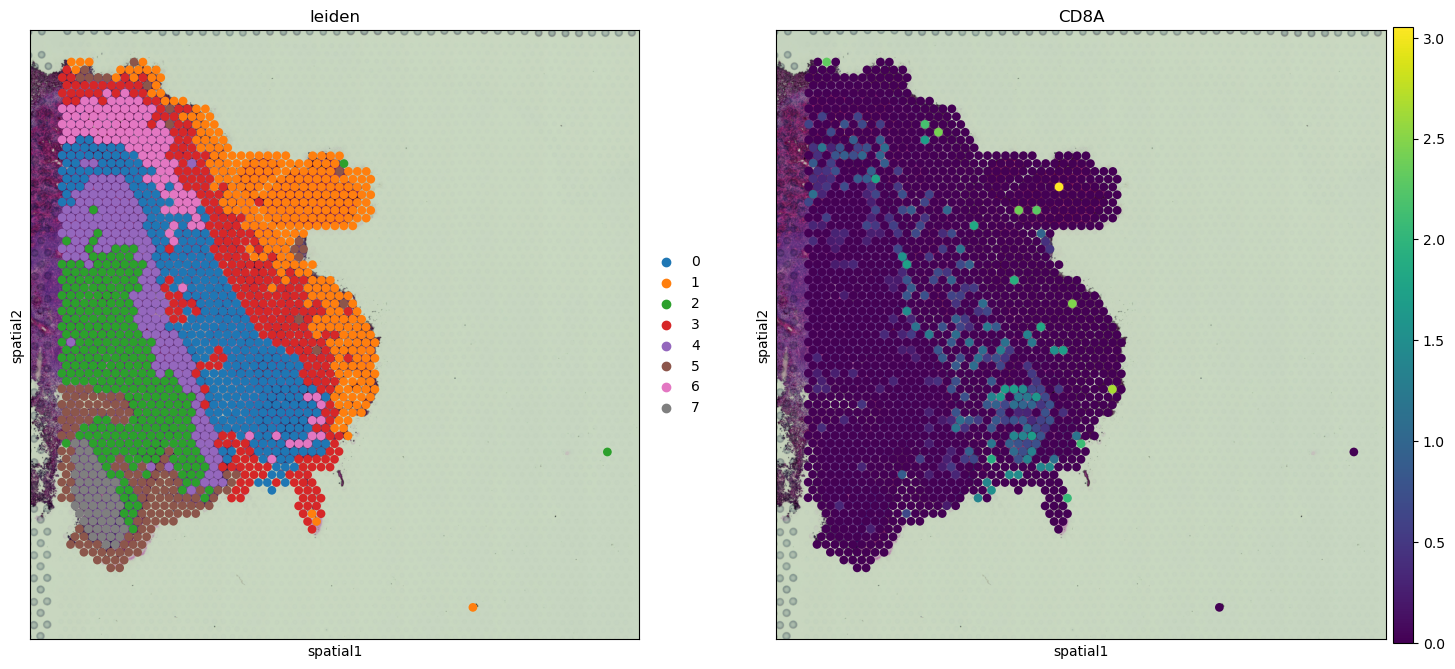

In [44]:
sc.pl.spatial(adata_16, img_key="hires", color=["leiden", "CD8A"], size=1.5,)

categories: 0, 1, 2, etc.
var_group_labels: 0


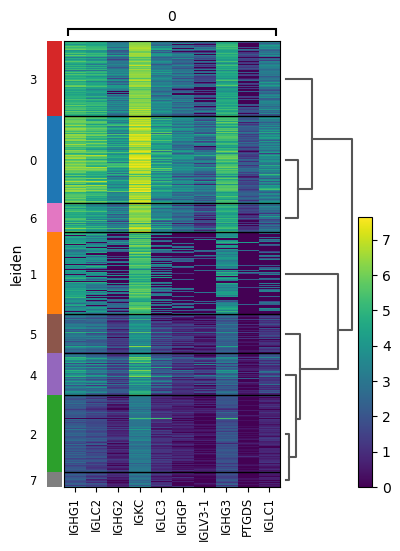

In [45]:
sc.pl.rank_genes_groups_heatmap(adata_16, groups="0", n_genes=10, groupby="leiden")

## Print de n top n genes per cluster.

In [46]:
# Obtain the top features for each cluster
result = adata_16.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
IGHG1
IGLC2
IGHG2
IGKC
IGLC3
IGHGP
IGLV3-1
IGHG3
PTGDS
IGLC1

Cluster 1 top features:
MTRNR2L12
MT-CYB
MT-ATP6
MT-ND3
MT-CO1
MT-ND2
MT-ND4
MT-CO3
MT-CO2
MT-ND1

Cluster 2 top features:
RPS3
RPL11
RPS4X
RPS23
RPL37A
RPS15A
RPL26
RPS3A
RPL36A
RPS12

Cluster 3 top features:
IGHG3
IGKC
IGLC1
IGLC2
IGHA1
MT-ND4
MT-ND3
MT-ND2
IGHGP
MTRNR2L12

Cluster 4 top features:
HLA-C
B2M
SERPINE2
HLA-A
TNC
HLA-B
S100B
SELENOW
FTH1
WARS

Cluster 5 top features:
PMEL
S100A6
MT-CO2
VIM
MIF
HSPA1A
GAPDH
DCT
HSPA1B
ENO1

Cluster 6 top features:
COL4A1
COL4A2
IGFBP7
COL6A2
COL3A1
COL1A1
COL1A2
PDGFRB
BGN
COL6A1

Cluster 7 top features:
S100A6
PLCG2
MT2A
MIF
PMEL
EMP3
GAPDH
S100A1
GSTP1
CD63



In [47]:
# Access the marker genes results from rank_genes_groups
marker_genes = adata_16.uns['rank_genes_groups']

# Iterate over each group and print the marker genes
for group in marker_genes['names'].dtype.names:
    print(f"Group: {group}")
    print(marker_genes['names'][group][:10])  # Print the top 10 marker genes
    print("\n")

Group: 0
['IGHG1' 'IGLC2' 'IGHG2' 'IGKC' 'IGLC3' 'IGHGP' 'IGLV3-1' 'IGHG3' 'PTGDS'
 'IGLC1']


Group: 1
['MTRNR2L12' 'MT-CYB' 'MT-ATP6' 'MT-ND3' 'MT-CO1' 'MT-ND2' 'MT-ND4'
 'MT-CO3' 'MT-CO2' 'MT-ND1']


Group: 2
['RPS3' 'RPL11' 'RPS4X' 'RPS23' 'RPL37A' 'RPS15A' 'RPL26' 'RPS3A' 'RPL36A'
 'RPS12']


Group: 3
['IGHG3' 'IGKC' 'IGLC1' 'IGLC2' 'IGHA1' 'MT-ND4' 'MT-ND3' 'MT-ND2' 'IGHGP'
 'MTRNR2L12']


Group: 4
['HLA-C' 'B2M' 'SERPINE2' 'HLA-A' 'TNC' 'HLA-B' 'S100B' 'SELENOW' 'FTH1'
 'WARS']


Group: 5
['PMEL' 'S100A6' 'MT-CO2' 'VIM' 'MIF' 'HSPA1A' 'GAPDH' 'DCT' 'HSPA1B'
 'ENO1']


Group: 6
['COL4A1' 'COL4A2' 'IGFBP7' 'COL6A2' 'COL3A1' 'COL1A1' 'COL1A2' 'PDGFRB'
 'BGN' 'COL6A1']


Group: 7
['S100A6' 'PLCG2' 'MT2A' 'MIF' 'PMEL' 'EMP3' 'GAPDH' 'S100A1' 'GSTP1'
 'CD63']




### CELL TYPE ANNOTATION

In [48]:
# Guardar el objeto AnnData como archivo h5ad
output_path = '/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Results/adata_16.h5ad'
adata_16.write(output_path)

In [ ]:
adata_16 <- sc.read('/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Results/adata_16.h5ad')

In [203]:
#export our data
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("scanpy_result_adata16.csv")

### SCSA: cell type annotation for single-cell RNA-seq data


Esto es más probabilístico no machine learning

In [1]:
!pwd

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Scripts


In [5]:
%%bash
cd /data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA
python3 SCSA.py -d whole_v2.db -i /data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Results/scanpy_result_adata16.csv -s scanpy -E -f1.5 -p 0.01 -o result.txt -m txt

Version V1.1 [2020/07/03]
DB load: 47347 3 3 91969 37440
Namespace(input='/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/Results/scanpy_result_adata16.csv', output='result.txt', db='whole_v2.db', source='scanpy', cluster='all', MarkerDB=None, foldchange=1.5, pvalue=0.01, weight=100.0, species='Human', tissue='All', outfmt='txt', celltype='normal', target='cellmarker', Gensymbol=True, norefdb=False, noprint=False, list_tissue=False)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 91969 37440
load markers: 77000
############################## Cluster 0 ##############################

Cell Num: 553
Gene Num: 441
Not Zero: 2870
Cluster 0 Gene number: 504
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     T cell            11.4055   1.1  
------------------------------------------------------------
                    (B cell)           (10.8390)
-

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value  q-value sig                           go_name
GO:0006955        58             31 1.820241e-08 0.000027 ***                   immune response
GO:0002250        31              8 4.244420e-08 0.000032 ***          adaptive immune response
GO:0050776        33             13 1.078202e-06 0.000536 ***     regulation of immune response
GO:0045087        43             26 9.242257e-06 0.003445  **            innate immune response
GO:0050853        24             11 1.159389e-04 0.034573   * B cell receptor signaling pathway


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 753
############################## Cluster 1 ##############################

Cell Num: 17
Gene Num: 12
Not Zero: 33
Cluster 1 Gene number: 12
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
Good       Red blood cell (erythrocyte) 3.4399    3.1  
------------------------------------------------------------

Go Enrichment analysis: Group1: 12 Group2: 1065
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value      q-value sig                                   go_name
GO:0008137         5              2 1.375132e-09 1.650158e-08 ***  NADH dehydrogenase (ubiquinone) activity
GO:0048019         2              1 3.395983e-04 2.037590e-03  **              receptor antagonist activity
GO:0022857         1              1 2.217022e-02 6.651065e-02   -        transmembrane transporter 

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value      q-value sig                                                  go_name
GO:0006120         5              1 3.950459e-10 1.066624e-08 ***     mitochondrial electron transport, NADH to ubiquinone
GO:0032981         4              2 1.316041e-07 1.776655e-06 ***       mitochondrial respiratory chain complex I assembly
GO:1900116         2              1 3.395983e-04 3.056385e-03  ** extracellular negative regulation of signal transduction
GO:0055093         2              2 6.749849e-04 3.644919e-03  **                                    response to hyperoxia
GO:0009060         2              2 6.749849e-04 3.644919e-03  **                                      aerobic respiration


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 1065
############################## Cluster 2 ##############################

Cell Num: 88
Gene Num: 126
Not Zero: 318
Cluster 2 Gene number: 243
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?          Natural killer T (NKT) cell  5.6459    1.2  
------------------------------------------------------------
                  (Melanocyte)         (4.8942)
------------------------------------------------------------

Go Enrichment analysis: Group1: 126 Group2: 974
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                            go_name
GO:0003723        21             44 0.000003 0.000376 ***                        RNA binding
GO:0003735         8              8 0.000139 0.009332  ** structural constituent of ribosome
GO:0015631         3           

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                                             go_name
GO:0006413         6              1 0.000013 0.004916  **                                            translational initiation
GO:0000184         4              1 0.000751 0.095678   - nuclear-transcribed mRNA catabolic process, nonsense-mediated decay
GO:0006614         4              1 0.000751 0.095678   -         SRP-dependent cotranslational protein targeting to membrane
GO:0006412         6              8 0.002778 0.238425   -                                                         translation
GO:0006091         4              3 0.004369 0.238425   -                      generation of precursor metabolites and energy


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 974
############################## Cluster 3 ##############################

Cell Num: 20
Gene Num: 8
Not Zero: 36
Cluster 3 Gene number: 9
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     B cell            3.3963    1.6  
------------------------------------------------------------
                  (Plasma cell)        (2.1136)
------------------------------------------------------------

Go Enrichment analysis: Group1: 8 Group2: 1076
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value      q-value sig                            go_name
GO:0034987         6             15 6.674546e-10 4.004727e-09 ***    immunoglobulin receptor binding
GO:0003823         6             30 2.338320e-08 7.014959e-08 ***                    antigen binding
GO:0004252    

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value      q-value sig                                  go_name
GO:0050871         6             14 4.775210e-10 1.201418e-08 *** positive regulation of B cell activation
GO:0006910         6             15 6.674546e-10 1.201418e-08 ***                phagocytosis, recognition
GO:0006911         6             23 5.767817e-09 6.921380e-08 ***                 phagocytosis, engulfment
GO:0042742         6             26 1.094981e-08 7.883866e-08 ***            defense response to bacterium
GO:0050853         6             26 1.094981e-08 7.883866e-08 ***        B cell receptor signaling pathway


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 1076
############################## Cluster 4 ##############################

Cell Num: 127
Gene Num: 67
Not Zero: 257
Cluster 4 Gene number: 111
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                Microglial cell        5.8349    1.1  
------------------------------------------------------------
              (Natural killer cell)    (5.2805)
------------------------------------------------------------

Go Enrichment analysis: Group1: 67 Group2: 1013
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                      go_name
GO:0042605         6              3 0.000003 0.000292 ***                      peptide antigen binding
GO:0048248         3              1 0.000874 0.038475   *             CXCR3 chemokine receptor binding
G

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                                                                         go_name
GO:0060333         6              7 0.000056 0.020785   *                                                     interferon-gamma-mediated signaling pathway
GO:0061844         5              5 0.000157 0.029335   *                         antimicrobial humoral immune response mediated by antimicrobial peptide
GO:0051281         3              2 0.002089 0.186648   -                          positive regulation of release of sequestered calcium ion into cytosol
GO:0002479         3              2 0.002089 0.186648   - antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-dependent
GO:0019886         4              7 0.003211 0.186648   -               antigen processing and presentation of exogenous peptide antigen via MHC class II


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 1013
############################## Cluster 5 ##############################

Cell Num: 37
Gene Num: 18
Not Zero: 52
Cluster 5 Gene number: 31
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                   Astrocyte           3.9893    1.2  
------------------------------------------------------------
                  (Melanocyte)         (3.2329)
------------------------------------------------------------

Go Enrichment analysis: Group1: 18 Group2: 1062
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                               go_name
GO:0042393         3              3 0.000076 0.003205  **                       histone binding
GO:0016491         3              4 0.000131 0.003205  **               oxidoreductase activity
GO:0016887         3     

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                        go_name
GO:0046034         3              2 0.000038 0.004465  **                          ATP metabolic process
GO:0090084         2              2 0.001545 0.019880   * negative regulation of inclusion body assembly
GO:0061621         2              2 0.001545 0.019880   *                           canonical glycolysis
GO:1901673         2              2 0.001545 0.019880   *         regulation of mitotic spindle assembly
GO:0090063         2              2 0.001545 0.019880   *  positive regulation of microtubule nucleation


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 1062
############################## Cluster 6 ##############################

Cell Num: 461
Gene Num: 475
Not Zero: 2396
Cluster 6 Gene number: 552
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                Endothelial cell       16.0290   1.8  
------------------------------------------------------------
                  (Fibroblast)         (8.7831)
------------------------------------------------------------

Go Enrichment analysis: Group1: 475 Group2: 717
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                     go_name
GO:0005201        41             22 0.000029  0.00562  ** extracellular matrix structural constituent
GO:0005509        52             33 0.000031  0.00562  **                         calcium ion binding
GO

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value  q-value sig                           go_name
GO:0001525        46             17 4.376871e-08 0.000068 ***                      angiogenesis
GO:0030198        59             34 1.481200e-06 0.001148  ** extracellular matrix organization
GO:0001570        16              2 2.123221e-05 0.010970   *                    vasculogenesis
GO:0007507        22              7 7.390294e-05 0.028637   *                 heart development
GO:0007155        50             36 2.884532e-04 0.089420   -                     cell adhesion


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 717
############################## Cluster 7 ##############################

Cell Num: 75
Gene Num: 79
Not Zero: 199
Cluster 7 Gene number: 113
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                   Melanocyte          5.0723    1.3  
------------------------------------------------------------
          (Natural killer T (NKT) cell)(3.9653)
------------------------------------------------------------

Go Enrichment analysis: Group1: 79 Group2: 1021
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num      p-value  q-value sig                            go_name
GO:0003723        19             48 3.518982e-08 0.000005 ***                        RNA binding
GO:0003735         8              8 4.023779e-06 0.000262 *** structural constituent of ribosome
GO:0051082         5 

/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Process <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                     go_name
GO:0070126         5              4 0.000169 0.028866   *     mitochondrial translational termination
GO:0070125         5              4 0.000169 0.028866   *      mitochondrial translational elongation
GO:0006412         6              8 0.000215 0.028866   *                                 translation
GO:1900034         4              3 0.000732 0.073776   -     regulation of cellular response to heat
GO:1901687         3              1 0.001356 0.109255   - glutathione derivative biosynthetic process


/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/SCSA.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outs = all_outs.append(outs)



Other Gene number: 1021
################################################################################

#Cluster Type Celltype Score Times
['0', '?', 'T cell|B cell', '11.40552057765763|10.838980911907667', 1.0522687206808865]
['1', 'Good', 'Red blood cell (erythrocyte)', 3.4398572591972725, 3.099217410976923]
['2', '?', 'Natural killer T (NKT) cell|Melanocyte', '5.645895202367919|4.894217291513464', 1.1535849076741769]
['3', '?', 'B cell|Plasma cell', '3.3962794300887276|2.1135861516795336', 1.6068800542575086]
['4', '?', 'Microglial cell|Natural killer cell', '5.834897561196033|5.280487065117391', 1.104992302649702]
['5', '?', 'Astrocyte|Melanocyte', '3.98934095269811|3.2328790326102657', 1.233990171750122]
['6', '?', 'Endothelial cell|Fibroblast', '16.028999256870943|8.783063931844145', 1.8249894776190474]
['7', '?', 'Melanocyte|Natural killer T (NKT) cell', '5.072304854516834|3.9652536143286805', 1.279188003558652]


In [7]:
import pandas as pd
# Read the text document into a DataFrame
df = pd.read_csv('/data/scratch/LAB/enric/zz_Spatial_Seq_Hudosn/SCSA/result.txt', sep='\t')
df

Cell Type    Z-score  Cluster
0                              T cell  11.405521        0
1                              B cell  10.838981        0
2                         Plasma cell   6.569574        0
3                          Macrophage   6.451128        0
4                            Monocyte   5.552276        0
...                               ...        ...      ...
1373    CD34+ hematopoietic stem cell  -0.428811        7
1374  Granulocyte-monocyte progenitor  -0.429192        7
1375      Effector memory CD4+ T cell  -0.429457        7
1376                      Acinar cell  -0.429493        7
1377                       Neutrophil  -0.429586        7

[1378 rows x 3 columns]

In [8]:
# Group the data by "Cluster" and find the cell type with the highest Z-score in each group
highest_zscores = df.groupby('Cluster')['Z-score'].idxmax()
# Extract the corresponding cell types for the highest Z-scores
cell_types_with_highest_zscores = df.loc[highest_zscores, 'Cell Type'].tolist()

In [9]:
cell_types_with_highest_zscores

['T cell',
 'Red blood cell (erythrocyte)',
 'Natural killer T (NKT) cell',
 'B cell',
 'Microglial cell',
 'Astrocyte',
 'Endothelial cell',
 'Melanocyte']

In [10]:
cluster_to_cell_type = {cluster_num: cell_type for cluster_num, cell_type in enumerate(cell_types_with_highest_zscores)}
cluster_to_cell_type

{0: 'T cell',
 1: 'Red blood cell (erythrocyte)',
 2: 'Natural killer T (NKT) cell',
 3: 'B cell',
 4: 'Microglial cell',
 5: 'Astrocyte',
 6: 'Endothelial cell',
 7: 'Melanocyte'}